In [7]:
import backtrader as bt
import pyfolio as pf
import yfinance as yf
import pandas as pd


In [8]:
# 分析台積電股票的歷史價格數據，生成投資收益報表
# 取得從 2015/1/1 ~ 2023/12/31 的台積電股票數據
stock_data: pd.DataFrame = yf.download(tickers="2330.TW", start="2015-01-01", end="2023-12-31").droplevel(
    level="Ticker", axis=1
)


/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_16819/583496735.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data: pd.DataFrame = yf.download(tickers="2330.TW", start="2015-01-01", end="2023-12-31").droplevel(
[*********************100%***********************]  1 of 1 completed


In [9]:
stock_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-05,103.384003,104.125107,101.901795,104.125107,32046000
2015-01-06,98.937355,101.901770,98.566803,101.901770,66778000
2015-01-07,99.307953,100.049057,98.937401,98.937401,43703000
2015-01-08,102.272354,102.272354,100.790146,101.160698,42491000
2015-01-09,99.307953,100.419609,98.566849,100.049057,61558000
...,...,...,...,...,...
2023-12-25,566.267151,570.165720,565.292509,567.241793,9548143
2023-12-26,571.140320,571.140320,567.241751,568.216393,16094308
2023-12-27,576.988159,576.988159,571.140306,572.114948,33401336


In [12]:
type(stock_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.879%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2015-01-05
End date,2023-12-29
Total months,104
,Backtest
Annual return,21.879%
Cumulative returns,459.045%
Annual volatility,25.029%
Sharpe ratio,0.92
Calmar ratio,0.49
Stability,0.92
Max drawdown,-44.799%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.80,2022-01-17,2022-10-25,NaT,NaN
1,27.63,2020-01-14,2020-03-19,2020-07-08,127
2,23.20,2015-02-25,2015-08-24,2016-02-18,257
3,21.51,2018-09-27,2019-01-04,2019-04-22,148
4,18.39,2021-01-21,2021-05-13,2022-01-14,257


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


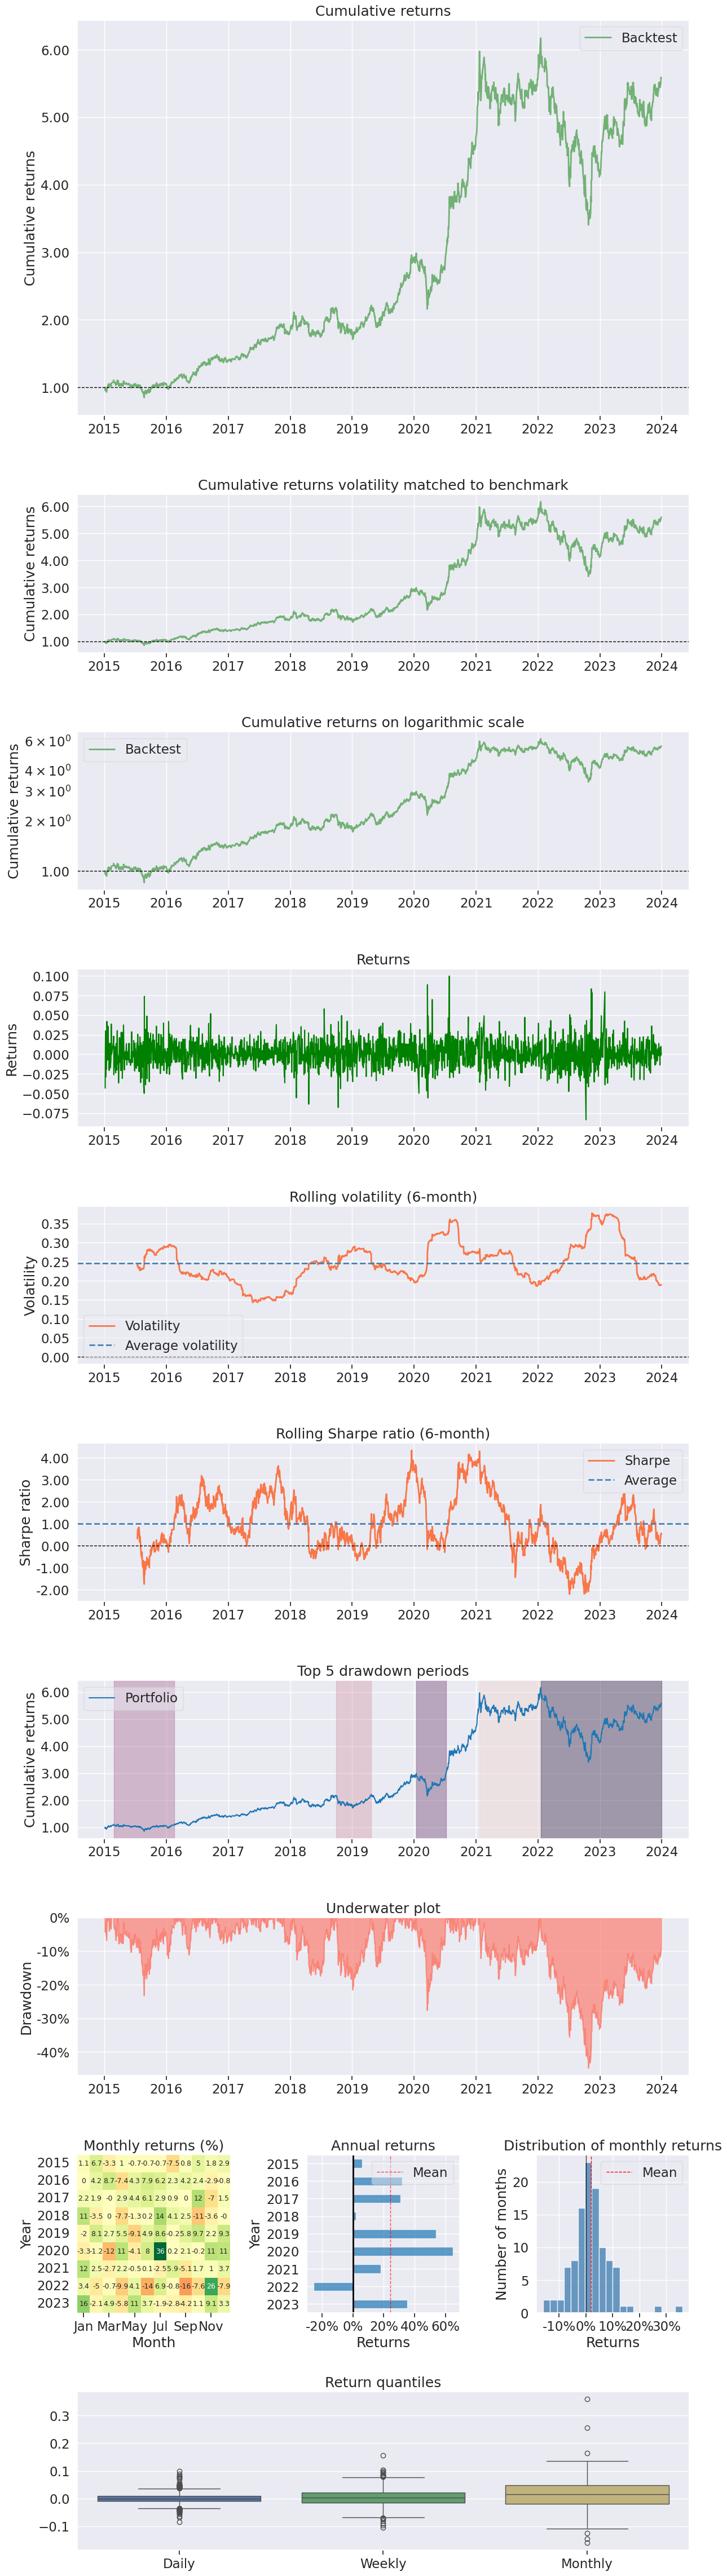

In [ ]:
from typing import Optional
import pandas as pd

# 將股票數據的索引（日期）設置為台北時間
stock_data.index = stock_data.index.tz_localize("Asiz/Taipei")

# 計算每日收盤價的百分比變動，這代表每日的收益率
pct_change_close_data = stock_data["Close"].pct_change()

# 使用 Pyfolio 生成投資收益報表，分析每日收益率
pf.create_returns_tear_sheet(pct_change_close_data)


In [ ]:
variable: str = "234"

In [11]:
from typing import cast 

if stock_data is not None:
    index = cast(pd.DatetimeIndex, stock_data.index)

    stock_data.index = index.tz_localize("Asia/Taipei")
    print(stock_data.index)

DatetimeIndex(['2015-01-05 00:00:00+08:00', '2015-01-06 00:00:00+08:00',
               '2015-01-07 00:00:00+08:00', '2015-01-08 00:00:00+08:00',
               '2015-01-09 00:00:00+08:00', '2015-01-12 00:00:00+08:00',
               '2015-01-13 00:00:00+08:00', '2015-01-14 00:00:00+08:00',
               '2015-01-15 00:00:00+08:00', '2015-01-16 00:00:00+08:00',
               ...
               '2023-12-18 00:00:00+08:00', '2023-12-19 00:00:00+08:00',
               '2023-12-20 00:00:00+08:00', '2023-12-21 00:00:00+08:00',
               '2023-12-22 00:00:00+08:00', '2023-12-25 00:00:00+08:00',
               '2023-12-26 00:00:00+08:00', '2023-12-27 00:00:00+08:00',
               '2023-12-28 00:00:00+08:00', '2023-12-29 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Taipei]', name='Date', length=2192, freq=None)


In [26]:
# 將台積電的表現與追蹤指數的 ETF 作比較，生成投資收益表

# 取得 0050 ETF 從 2015/1/1 ~ 2023/12/31 的數據
benchmark_data = yf.download(tickers="0050.TW", start="2015-01-01", end="2023-12-31").droplevel(
    level="Ticker", axis=1
)


/var/folders/jd/cst_1lwd4vdgv06j7c62ffp00000gn/T/ipykernel_16819/2660516246.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(tickers="0050.TW", start="2015-01-01", end="2023-12-31").droplevel(
[*********************100%***********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.879%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2015-01-05
End date,2023-12-29
Total months,104
,Backtest
Annual return,21.879%
Cumulative returns,459.045%
Annual volatility,25.029%
Sharpe ratio,0.92
Calmar ratio,0.49
Stability,0.92
Max drawdown,-44.799%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.80,2022-01-17,2022-10-25,NaT,NaN
1,27.63,2020-01-14,2020-03-19,2020-07-08,127
2,23.20,2015-02-25,2015-08-24,2016-02-18,257
3,21.51,2018-09-27,2019-01-04,2019-04-22,148
4,18.39,2021-01-21,2021-05-13,2022-01-14,257


/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/opt/homebrew/Caskroom/miniforge/base/envs/stock/lib/python3.13/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


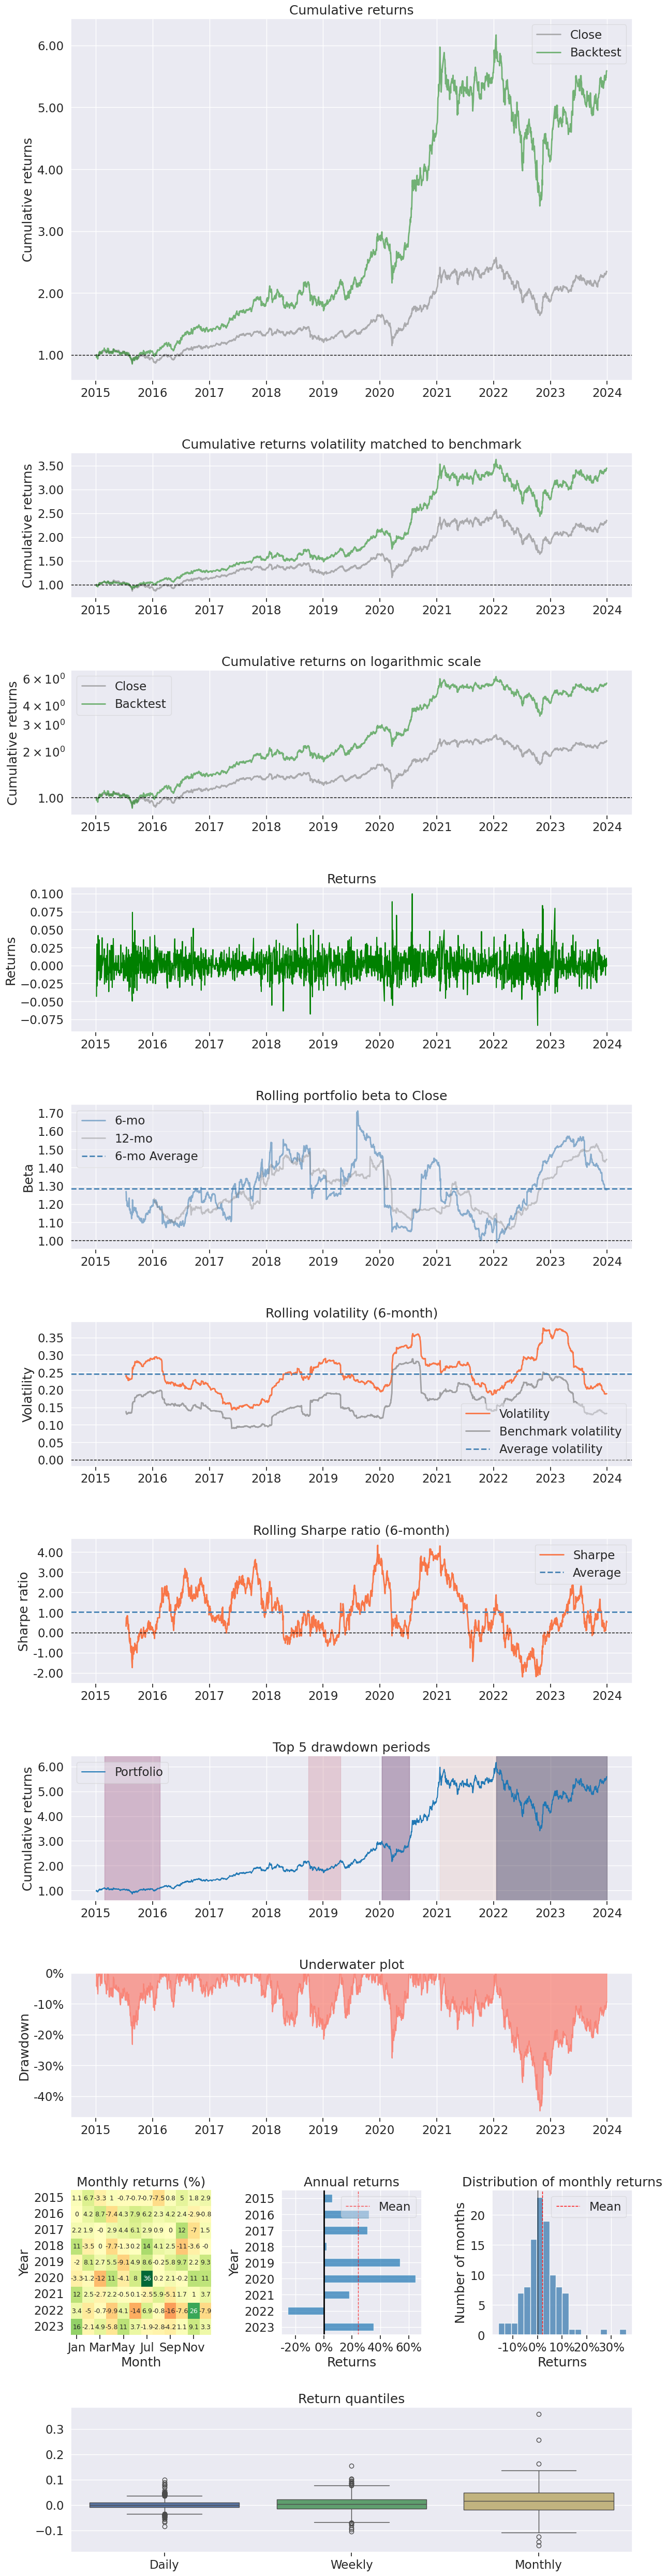

In [28]:
benchmark_data.index = benchmark_data.index.tz_localize("Asia/Taipei")

# 計算每日收盤價的百分比變動，這代表每日的收益率
pct_change_benchmark_close_data = benchmark_data["Close"].pct_change()

# 使用 Pyfolio 生成投資收益報表，將台積電績效表現與 ETF 比較
pf.create_returns_tear_sheet(
    pct_change_close_data, benchmark_rets=pct_change_benchmark_close_data
)